In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
stock_prices = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/stock_prices_latest.csv')

In [3]:
stock_prices = stock_prices.dropna()
stock_prices

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,5/16/2016,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,1/16/2002,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,9/18/2001,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,10/26/2007,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,6/27/2014,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...
1048570,BOKF,10/4/2010,45.09,45.41,44.83,45.00,36.9596,99100,1.0
1048571,BOKF,1/19/2007,52.51,52.66,52.33,52.63,40.2866,31500,1.0
1048572,BOKF,10/6/2011,48.11,48.81,47.16,48.74,40.8965,137700,1.0
1048573,BOKF,4/13/2011,52.19,52.39,51.13,51.13,42.4157,32800,1.0


In [4]:
dataset_summary = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/dataset_summary.csv')

In [5]:
dataset_summary = dataset_summary.dropna()
dataset_summary

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5274,1999-11-18,2020-11-03,46,2009-05-14,2020-08-18
1,AA,1009,2016-11-01,2020-11-03,16,2017-01-24,2020-10-14
3,AABA,5486,1998-01-02,2020-03-10,14,2014-01-28,2017-04-18
4,AAC,1294,2014-10-02,2020-07-02,22,2014-11-05,2019-08-30
9,AAL,3811,2005-09-27,2020-11-13,28,2014-01-28,2020-10-22
...,...,...,...,...,...,...,...
7780,ZUO,651,2018-04-11,2020-11-06,7,2019-03-21,2020-09-02
7781,ZVO,2914,2009-04-15,2020-11-06,6,2019-05-09,2020-10-28
7783,ZYME,893,2017-04-28,2020-11-11,15,2017-05-15,2020-11-03
7784,ZYNE,1089,2015-08-05,2019-11-29,22,2015-08-27,2020-11-09


In [6]:
earnings_latest = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/earnings_latest.csv')

In [7]:
earnings_latest = earnings_latest.dropna()
earnings_latest

,symbol,date,qtr,eps_est,eps,release_time
14,A,2012-11-19,10/2012,0.800,0.84,post
15,A,2013-02-14,01/2013,0.660,0.63,post
16,A,2013-05-14,04/2013,0.670,0.77,post
17,A,2013-08-14,07/2013,0.620,0.68,post
18,A,2013-11-14,10/2013,0.760,0.81,post
...,...,...,...,...,...,...
160655,ZYXI,2019-10-29,Q3,0.057,0.06,post
160656,ZYXI,2020-02-27,Q4,0.077,0.09,post
160657,ZYXI,2020-04-28,Q1,0.063,0.09,post
160658,ZYXI,2020-07-28,Q2,0.086,0.09,post


In [8]:
dividends_latest = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/dividends_latest.csv')

In [9]:
dividends_latest = dividends_latest.dropna()
dividends_latest

,symbol,date,dividend
0,MSFT,2016-11-15,0.3900
1,MSFT,2011-05-17,0.1600
2,MSFT,2008-05-13,0.1100
3,MSFT,2011-02-15,0.1600
4,MSFT,2012-02-14,0.2000
...,...,...,...
250144,EBTC,2020-11-09,0.1750
250145,EFAS,2020-11-04,0.0525
250146,EFBI,2020-11-12,0.0500
250147,CDL,2020-11-12,0.1111


In [10]:
nasdaq_stocks = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/nasdaq_stocks.csv')

In [11]:
nasdaq_stocks.columns = nasdaq_stocks.columns.str.lower()
nasdaq_stocks

,nasdaq traded,symbol,security name,listing exchange,market category,etf,round lot size,test issue,financial status,cqs symbol,nasdaq symbol,nextshares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
3,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N
4,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
...,...,...,...,...,...,...,...,...,...,...,...,...
8044,Y,ZUO,"Zuora, Inc. Class A Common Stock",N,,N,100.0,N,NaN,ZUO,ZUO,N
8045,Y,ZVO,Zovio Inc. - Common Stock,Q,Q,N,100.0,N,N,NaN,ZVO,N
8046,Y,ZYME,Zymeworks Inc. Common Shares,N,,N,100.0,N,NaN,ZYME,ZYME,N
8047,Y,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",Q,G,N,100.0,N,N,NaN,ZYNE,N


In [12]:
gross_output = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/gross_output.csv', skiprows=5, skipfooter=6, index_col=1)

<ipython-input-12-b73542c384bd>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gross_output = pd.read_csv('C:/Users/zachx/Documents/Data_Bootcamp/gross_output.csv', skiprows=5, skipfooter=6, index_col=1)


In [13]:
gross_output

,Line,Q1,Q2,Q3,Q4,Q1.1,Q2.1,Q3.1,Q4.1,Q1.2,Q2.2
All industries,1.0,35838.6,36453.0,36916.7,37205.3,37377.9,37709.1,37991.1,38189.9,37826.8,34260.0
Private industries,2.0,31958.1,32523.1,32940.9,33195.7,33349.6,33632.4,33887.0,34052.5,33685.4,30215.1
"Agriculture, forestry, fishing, and hunting",3.0,457.1,460.9,449.9,454.8,447.0,448.4,453.0,461.3,467.7,416.6
Farms,4.0,401.1,405.0,395.8,400.9,392.3,394.1,399.1,405.9,413.1,367.9
"Forestry, fishing, and related activities",5.0,56.0,55.9,54.1,53.8,54.6,54.2,53.9,55.4,54.6,48.7
...,...,...,...,...,...,...,...,...,...,...,...
General government,96.0,2360.1,2388.0,2417.1,2437.2,2440.6,2463.4,2479.0,2497.9,2499.9,2380.9
Government enterprises,97.0,354.8,358.2,360.9,364.5,366.8,371.4,373.5,375.1,372.8,346.0
Addenda:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Private goods-producing industries1,98.0,8721.7,8892.3,9029.4,9031.1,8989.1,9010.3,8966.9,8960.0,8869.9,7789.0


In [14]:
gross_output = gross_output.drop('Line', axis=1)

In [15]:
gross_output.columns = ['2018 Q1', '2018 Q2', '2018 Q3', '2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

In [16]:
gross_output = gross_output.dropna()
gross_output

,2018 Q1,2018 Q2,2018 Q3,2018 Q4,2019 Q1,2019 Q2,2019 Q3,2019 Q4,2020 Q1,2020 Q2
All industries,35838.6,36453.0,36916.7,37205.3,37377.9,37709.1,37991.1,38189.9,37826.8,34260.0
Private industries,31958.1,32523.1,32940.9,33195.7,33349.6,33632.4,33887.0,34052.5,33685.4,30215.1
"Agriculture, forestry, fishing, and hunting",457.1,460.9,449.9,454.8,447.0,448.4,453.0,461.3,467.7,416.6
Farms,401.1,405.0,395.8,400.9,392.3,394.1,399.1,405.9,413.1,367.9
"Forestry, fishing, and related activities",56.0,55.9,54.1,53.8,54.6,54.2,53.9,55.4,54.6,48.7
...,...,...,...,...,...,...,...,...,...,...
State and local,2714.9,2746.1,2777.9,2801.7,2807.4,2834.8,2852.6,2873.0,2872.7,2727.0
General government,2360.1,2388.0,2417.1,2437.2,2440.6,2463.4,2479.0,2497.9,2499.9,2380.9
Government enterprises,354.8,358.2,360.9,364.5,366.8,371.4,373.5,375.1,372.8,346.0
Private goods-producing industries1,8721.7,8892.3,9029.4,9031.1,8989.1,9010.3,8966.9,8960.0,8869.9,7789.0


In [17]:
gross_output_2020 = gross_output.groupby(gross_output.index)[['2020 Q1', '2020 Q2']].mean()
gross_output_2020

,2020 Q1,2020 Q2
Housing,2406.3,2427.1
Other real estate,1472.2,1386.1
Accommodation,251.5,98.9
Administrative and support services,1065.9,954.4
Ambulatory health care services,1144.1,924.7
...,...,...
Transportation and warehousing,1315.4,987.2
Utilities,481.2,478.4
Wholesale trade,2074.6,1810.9
Government,4141.4,4044.9


Text(0, 0.5, 'US Industries')

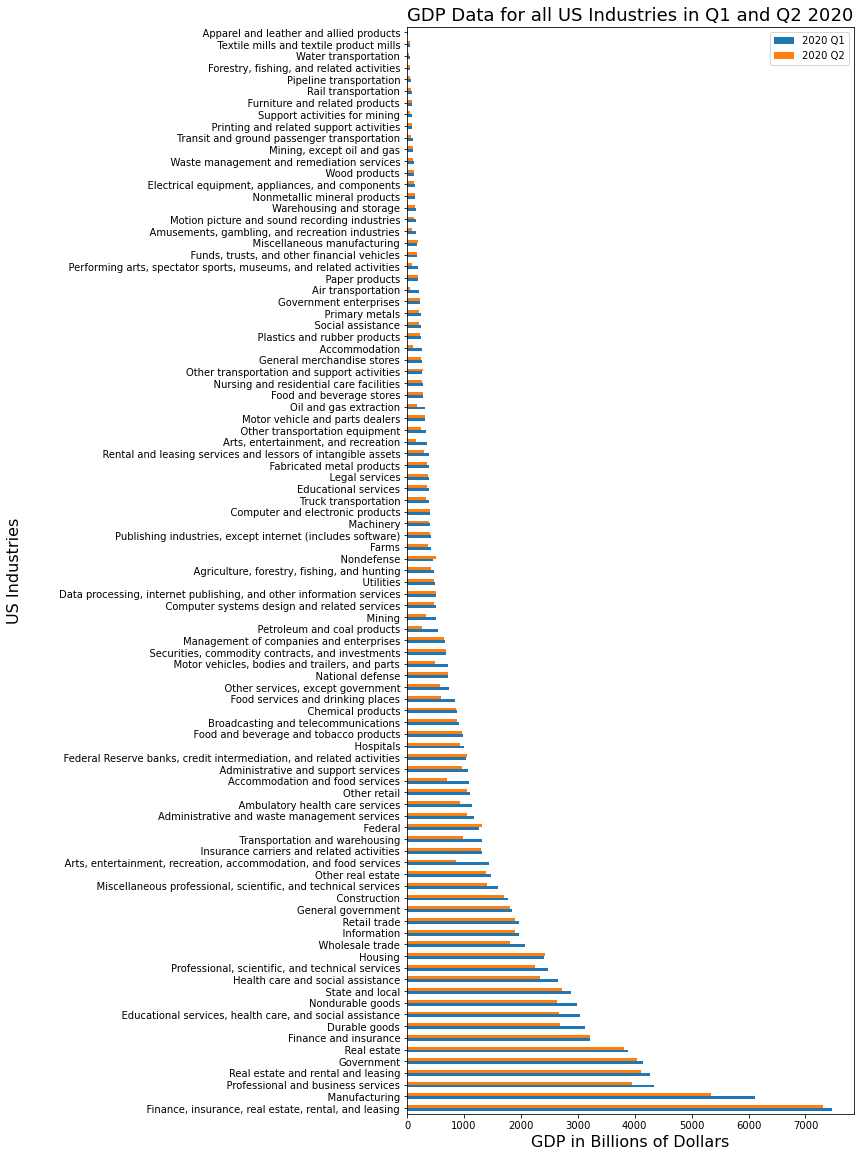

In [18]:
fig, ax = plt.subplots()

gross_output_2020.sort_values(by='2020 Q1', ascending=False).iloc[4:].plot.barh(ax=ax, figsize=(8,20))

ax.set_title('GDP Data for all US Industries in Q1 and Q2 2020', fontsize=18)
ax.set_xlabel('GDP in Billions of Dollars', fontsize=16)
ax.set_ylabel('US Industries', fontsize=16)

#With how limited the GDP dataset is, and how fundamentally different it is from the stock price dataset,
#there is no possible way to merge the two datasets and to find out the discrepancies between the actual economy and stock prices
#Thus, we probably cannot answer questions like why did stock price rise in 2020 for this sector, but not for the GDP of the same sector
#However, we can use this GDP data to make some inferences about the largest US industries, and how they relate to stock prices
#Do finance, real estate, and professional business services have companies in the stock market that generally have higher prices?
#Utilize outside knowledge and outside sources to weigh in on this information, and draw a parallel to our conclusions

In [19]:
nasdaq_prices = pd.merge(nasdaq_stocks, stock_prices, on='symbol', how='inner')
nasdaq_prices

,nasdaq traded,symbol,security name,listing exchange,market category,etf,round lot size,test issue,financial status,cqs symbol,nasdaq symbol,nextshares,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N,6/3/2010,9.55,9.640,8.99,9.2100,8.9067,30543700,1.0
1,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N,2/10/2015,47.40,48.375,46.90,48.0500,46.7987,9085330,1.0
2,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N,8/6/2012,10.94,11.120,10.80,10.8100,10.4540,14823056,1.0
3,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N,1/6/2014,26.62,27.200,26.60,27.0300,26.1399,11271400,1.0
4,Y,AAL,"American Airlines Group, Inc. - Common Stock",Q,Q,N,100.0,N,N,NaN,AAL,N,11/6/2014,42.59,44.130,42.59,43.1400,41.9306,14477213,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853054,Y,MSFT,Microsoft Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,MSFT,N,10/24/2017,78.90,79.200,78.46,78.8600,78.4629,16613928,1.0
853055,Y,MSFT,Microsoft Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,MSFT,N,2/1/2001,60.81,62.630,60.38,62.3800,20.7629,35896400,1.0
853056,Y,MSFT,Microsoft Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,MSFT,N,2/1/2011,27.80,28.060,27.61,27.9925,23.2219,62810700,1.0
853057,Y,MSFT,Microsoft Corporation - Common Stock,Q,Q,N,100.0,N,N,NaN,MSFT,N,3/30/2016,54.93,55.640,54.90,55.0500,52.7890,23008260,1.0


In [20]:
nasdaq_prices_close = nasdaq_prices.groupby('symbol', as_index=False)['close'].mean().sort_values(by='close', ascending=False).head(10)
nasdaq_prices_close = nasdaq_prices_close.set_index('symbol')
nasdaq_prices_close

,close
symbol,
GOOG,721.194882
AMZN,214.303589
BIDU,182.029189
ATRI,171.722893
AAPL,169.371349
BIIB,130.001597
BBH,126.024187
ANAT,95.866887
AVGO,87.710048


Text(0, 0.5, 'Symbol')

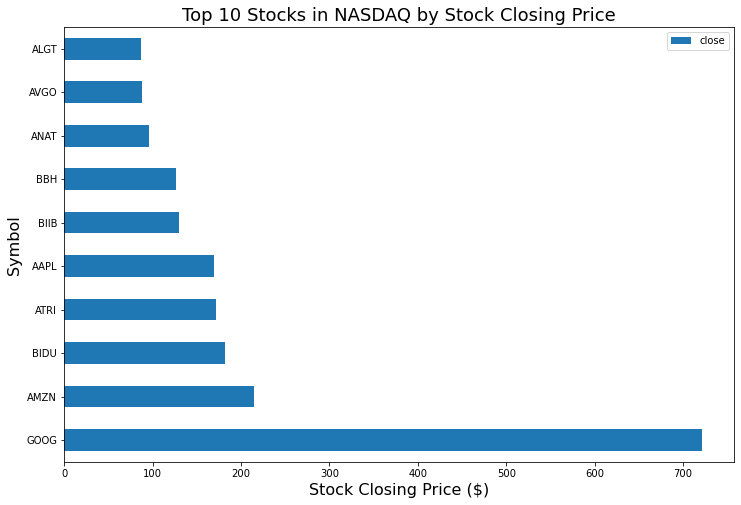

In [21]:
fig, ax = plt.subplots()

nasdaq_prices_close.plot.barh(ax=ax, figsize=(12,8))

ax.set_title('Top 10 Stocks in NASDAQ by Stock Closing Price', fontsize=18)
ax.set_xlabel('Stock Closing Price ($)', fontsize=16)
ax.set_ylabel('Symbol', fontsize=16)

In [22]:
earnings_stocks = pd.merge(earnings_latest, stock_prices, on='symbol', how='inner')

In [23]:
earnings_stocks_2020 = earnings_stocks[earnings_stocks['date_x'].str.contains('2020')]
del earnings_stocks_2020['date_y']
earnings_stocks_2020 = earnings_stocks_2020.rename({'date_x': 'date'}, axis=1)
earnings_stocks_2020

,symbol,date,qtr,eps_est,eps,release_time,open,high,low,close,close_adjusted,volume,split_coefficient
159132,AAOI,2020-02-27,Q4,-0.234,-0.18,post,25.85,25.85,24.8500,25.150,25.15,559407,1.0
159133,AAOI,2020-02-27,Q4,-0.234,-0.18,post,18.41,18.46,17.4300,18.420,18.42,209842,1.0
159134,AAOI,2020-02-27,Q4,-0.234,-0.18,post,22.10,22.42,21.6910,22.330,22.33,194600,1.0
159135,AAOI,2020-02-27,Q4,-0.234,-0.18,post,24.49,24.96,24.2300,24.740,24.74,148631,1.0
159136,AAOI,2020-02-27,Q4,-0.234,-0.18,post,12.93,13.13,12.5600,12.980,12.98,293629,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15187200,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.70,0.70,0.7000,0.700,175.00,0,1.0
15187201,BMRA,2020-10-15,Q1,-0.080,-0.14,post,3.75,3.75,3.2813,3.375,843.75,100,1.0
15187202,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.43,0.43,0.4300,0.430,107.50,0,1.0
15187203,BMRA,2020-10-15,Q1,-0.080,-0.14,post,0.45,0.45,0.4500,0.450,112.50,0,1.0


In [24]:
from sklearn.linear_model import LinearRegression as linreg

In [25]:
reg = linreg().fit(earnings_stocks_2020[['eps_est']], earnings_stocks_2020['close'])

In [26]:
earnings_stocks_2020['yhat'] = reg.predict(earnings_stocks_2020[['eps_est']])

Text(0.5, 0, 'Earnings per Share Estimate (EPS Estimate)')

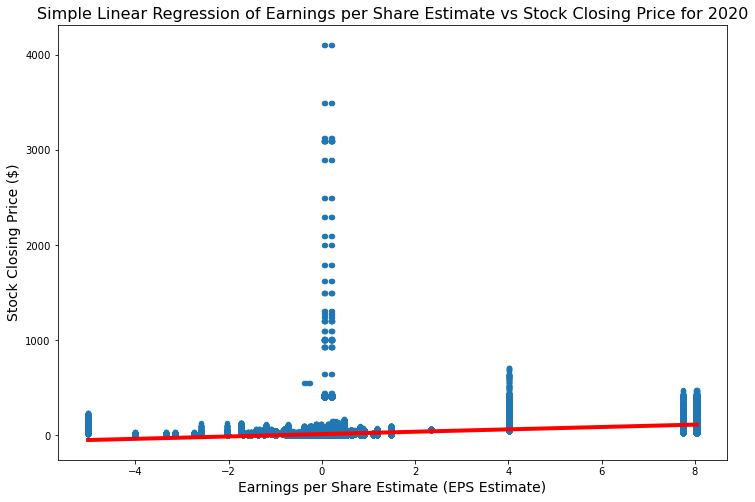

In [27]:
fig, ax = plt.subplots()

earnings_stocks_2020.plot.scatter(x='eps_est', y='close', ax=ax)
earnings_stocks_2020.sort_values('eps_est').set_index('eps_est')['yhat'].plot(color = 'red', linewidth=4, figsize=(12,8), ax=ax)

ax.set_title('Simple Linear Regression of Earnings per Share Estimate vs Stock Closing Price for 2020', fontsize=16)
ax.set_ylabel('Stock Closing Price ($)', fontsize=14)
ax.set_xlabel('Earnings per Share Estimate (EPS Estimate)', fontsize=14)

#Here, it looks like earnings per share estimate is a good enough predictor for the stock closing price, in the year of 2020
#Estimated EPS shows us the best outlook for a company's future financial performance
#Thus, it looks like we can accurately predict stock market growth using this variable. 

In [28]:
earnings_stocks_2020[['eps_est', 'close']].corr()

,eps_est,close
eps_est,1.000000,0.395993
close,0.395993,1.000000


In [29]:
reg.score(X = earnings_stocks_2020[['eps_est']], y = earnings_stocks_2020['close'])
#The regression model can explain 15.68% of the variation in the dependent variable (close)

0.15681048090093952

In [30]:
reg1 = smf.ols('eps_est ~ close', data=earnings_stocks_2020).fit()

In [31]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                eps_est   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                 1.340e+05
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:14:24   Log-Likelihood:            -1.2213e+06
No. Observations:              720507   AIC:                         2.443e+06
Df Residuals:                  720505   BIC:                         2.443e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0815      0.002    -49.632      0.0

In [32]:
reg1.pvalues['close']
#Very small, unlikely that this conclusion was chosen by chance

0.0

In [33]:
from sklearn.neighbors import KNeighborsRegressor as knn

In [34]:
knn1 = knn(n_neighbors=30).fit(X = earnings_stocks_2020[['eps_est']], y = earnings_stocks_2020['close'])

In [35]:
knn1.score(X = earnings_stocks_2020[['eps_est']], y = earnings_stocks_2020['close'])
#The k nearest neighbors model can explain 27.24% of the variation in the dependent variable (close)

0.27236398857640653

Text(0, 0.5, 'Stock Closing Price')

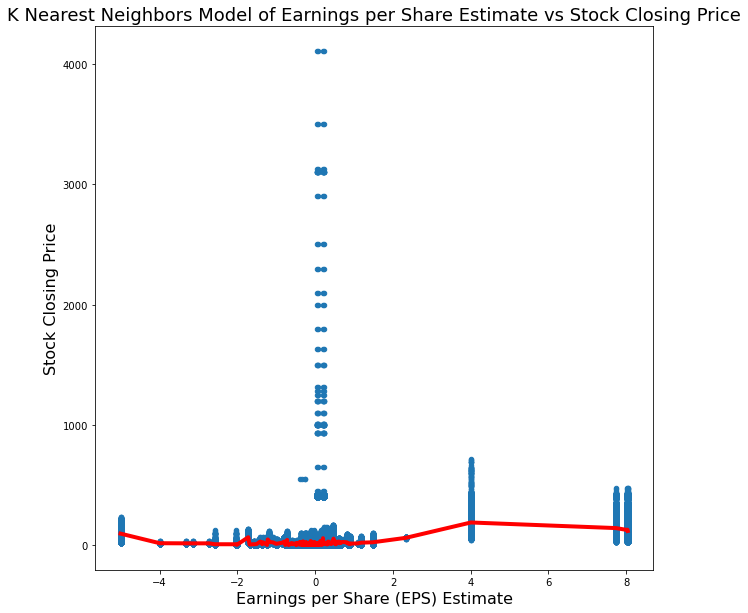

In [36]:
fig, ax = plt.subplots()

earnings_stocks_2020['yhat_knn'] = knn1.predict(earnings_stocks_2020[['eps_est']])

earnings_stocks_2020.plot.scatter(x='eps_est', y='close', ax=ax)
earnings_stocks_2020.sort_values('eps_est').set_index('eps_est')['yhat_knn'].plot(color='red', linewidth=4, figsize=(10,10), ax=ax)

ax.set_title('K Nearest Neighbors Model of Earnings per Share Estimate vs Stock Closing Price', fontsize=18)
ax.set_xlabel('Earnings per Share (EPS) Estimate', fontsize=16)
ax.set_ylabel('Stock Closing Price', fontsize=16)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, x_test, y_train, y_test = train_test_split(earnings_stocks_2020[['eps_est']], earnings_stocks_2020['close'])

In [39]:
knn(n_neighbors=30).fit(X_train, y_train).score(x_test, y_test)

0.23783025972318694

In [41]:
dividends_stocks = pd.merge(dividends_latest, stock_prices, on='symbol', how='inner')

In [43]:
dividends_stocks_2020 = dividends_stocks[dividends_stocks['date_x'].str.contains('2020')]
del dividends_stocks_2020['date_y']
dividends_stocks_2020 = dividends_stocks_2020.rename({'date_x': 'date'}, axis=1)
dividends_stocks_2020

,symbol,date,dividend,open,high,low,close,close_adjusted,volume,split_coefficient
290816,MSFT,2020-02-19,0.51,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
290817,MSFT,2020-02-19,0.51,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
290818,MSFT,2020-02-19,0.51,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
290819,MSFT,2020-02-19,0.51,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
290820,MSFT,2020-02-19,0.51,41.61,42.29,41.51,42.25,38.6773,74640000,1.0
...,...,...,...,...,...,...,...,...,...,...
23970812,AOBC,2020-09-16,0.05,0.78,0.81,0.69,0.69,0.6900,225200,1.0
23970813,AOBC,2020-09-16,0.05,1.75,1.78,1.70,1.78,1.7800,5300,1.0
23970814,AOBC,2020-09-16,0.05,1.45,1.45,1.35,1.42,1.4200,31500,1.0
23970815,AOBC,2020-09-16,0.05,3.88,3.93,3.87,3.92,3.9200,447900,1.0


In [44]:
from sklearn.linear_model import LinearRegression as linreg

In [50]:
reg2 = linreg().fit(dividends_stocks_2020[['dividend']], dividends_stocks_2020['close'])

In [51]:
dividends_stocks_2020['yhat'] = reg2.predict(dividends_stocks_2020[['dividend']])

Text(0.5, 0, 'Dividends ($)')

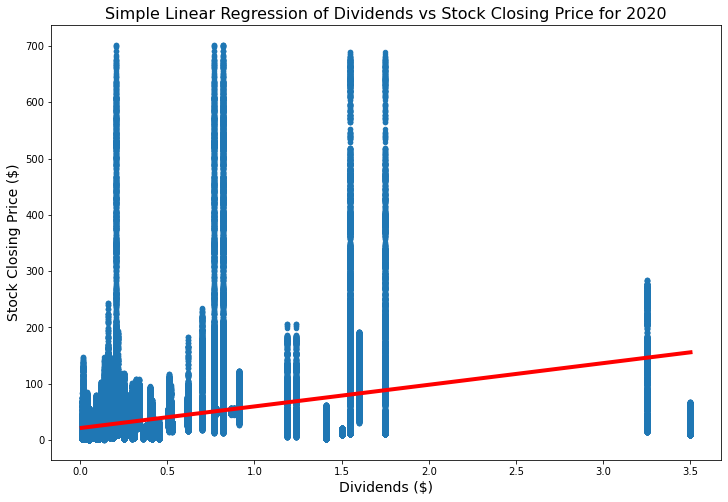

In [52]:
fig, ax = plt.subplots()

dividends_stocks_2020.plot.scatter(x='dividend', y='close', ax=ax)
dividends_stocks_2020.sort_values('dividend').set_index('dividend')['yhat'].plot(color = 'red', linewidth=4, figsize=(12,8), ax=ax)

ax.set_title('Simple Linear Regression of Dividends vs Stock Closing Price for 2020', fontsize=16)
ax.set_ylabel('Stock Closing Price ($)', fontsize=14)
ax.set_xlabel('Dividends ($)', fontsize=14)

In [53]:
dividends_stocks_2020[['dividend', 'close']].corr()

,dividend,close
dividend,1.000000,0.380043
close,0.380043,1.000000


In [54]:
reg3 = smf.ols('dividend ~ close', data=dividends_stocks_2020).fit()

In [55]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:               dividend   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                 1.544e+05
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:26:39   Log-Likelihood:            -5.1367e+05
No. Observations:              914632   AIC:                         1.027e+06
Df Residuals:                  914630   BIC:                         1.027e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1998      0.001    363.661      0.0

In [56]:
reg3.pvalues['close']

0.0

In [61]:
dataset_summary_latest = dataset_summary.loc[(dataset_summary['stock_to_date'].str.contains('2020')) & (dataset_summary['earnings_to_date'].str.contains('2020'))]
dataset_summary_latest

,symbol,total_prices,stock_from_date,stock_to_date,total_earnings,earnings_from_date,earnings_to_date
0,A,5274,1999-11-18,2020-11-03,46,2009-05-14,2020-08-18
1,AA,1009,2016-11-01,2020-11-03,16,2017-01-24,2020-10-14
9,AAL,3811,2005-09-27,2020-11-13,28,2014-01-28,2020-10-22
12,AAN,5748,1998-01-02,2020-11-03,46,2009-08-05,2020-10-29
13,AAOI,1798,2013-09-26,2020-11-13,29,2013-11-07,2020-11-05
...,...,...,...,...,...,...,...
7779,ZUMZ,3910,2005-05-06,2020-11-13,46,2009-05-21,2020-09-10
7780,ZUO,651,2018-04-11,2020-11-06,7,2019-03-21,2020-09-02
7781,ZVO,2914,2009-04-15,2020-11-06,6,2019-05-09,2020-10-28
7783,ZYME,893,2017-04-28,2020-11-11,15,2017-05-15,2020-11-03


In [64]:
reg4 = linreg().fit(dataset_summary_latest[['total_earnings']], dataset_summary_latest['total_prices'])

In [65]:
dataset_summary_latest['yhat'] = reg4.predict(dataset_summary_latest[['total_earnings']])

<ipython-input-65-1306e5cdc08f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_summary_latest['yhat'] = reg4.predict(dataset_summary_latest[['total_earnings']])


Text(0.5, 0, 'Total Earnings ($)')

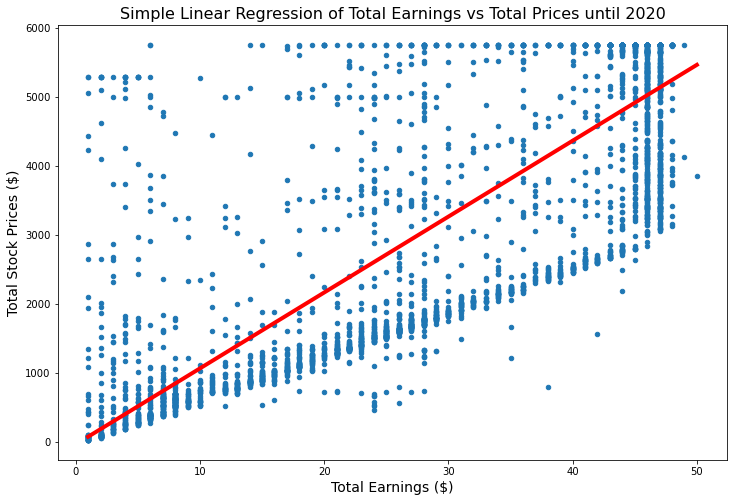

In [66]:
fig, ax = plt.subplots()

dataset_summary_latest.plot.scatter(x='total_earnings', y='total_prices', ax=ax)
dataset_summary_latest.sort_values('total_earnings').set_index('total_earnings')['yhat'].plot(color = 'red', linewidth=4, figsize=(12,8), ax=ax)

ax.set_title('Simple Linear Regression of Total Earnings vs Total Prices until 2020', fontsize=16)
ax.set_ylabel('Total Stock Prices ($)', fontsize=14)
ax.set_xlabel('Total Earnings ($)', fontsize=14)

In [63]:
dataset_summary_latest[['total_earnings', 'total_prices']].corr()

,total_earnings,total_prices
total_earnings,1.000000,0.819904
total_prices,0.819904,1.000000


In [67]:
reg4 = smf.ols('total_earnings ~ total_prices', data=dataset_summary_latest).fit()

In [68]:
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:         total_earnings   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     8118.
Date:                Mon, 07 Dec 2020   Prob (F-statistic):               0.00
Time:                        23:38:32   Log-Likelihood:                -14264.
No. Observations:                3960   AIC:                         2.853e+04
Df Residuals:                    3958   BIC:                         2.855e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6993      0.276     38.818   